<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [1]:
# Librerias
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Utilice este espacio para escribir el código.
oliveti_dataset = fetch_olivetti_faces(data_home="data")

(Utilice este espacio para describir su procedimiento).

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [3]:
oliveti_dataset.keys()
for k, v in oliveti_dataset.items():
    if hasattr(v, "shape"):  # Para cada k que tenga atributo shape se imprime su shape
        print(k, v.shape)
    else:
        print(v) # de lo contrario se imprime su contenido


data (400, 4096)
images (400, 64, 64)
target (400,)
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

===========

In [4]:
# Utilice este espacio para escribir el código.
# 2. Análisis preliminar

# Describir los contenidos de la base
print("Descripción de la base de datos oliveti_dataset:")
print(f" - Número total de imágenes: {oliveti_dataset.images.shape[0]}")
print(f" - Dimensiones de cada imagen: {oliveti_dataset.images.shape[1]} x {oliveti_dataset.images.shape[2]} píxeles")
print(f" - Número total de registros: {len(oliveti_dataset.target)}")
values, counts = np.unique(oliveti_dataset.target, return_counts=True)
print(f" - Ejemplo de registros en la base (id_persona, count):\n   - {list(zip(values[:5], counts[:5]))}")
print(f"    - Se tienen {len(values)} personas diferentes en la base con un total de {counts[0]} imágenes para cada uno.")
print(f" - Forma de la matriz de datos (imágenes aplanadas): {oliveti_dataset.data.shape}")
print(f" - Tipo de datos de las imágenes: {oliveti_dataset.images.dtype}")

Descripción de la base de datos oliveti_dataset:
 - Número total de imágenes: 400
 - Dimensiones de cada imagen: 64 x 64 píxeles
 - Número total de registros: 400
 - Ejemplo de registros en la base (id_persona, count):
   - [(0, 10), (1, 10), (2, 10), (3, 10), (4, 10)]
    - Se tienen 40 personas diferentes en la base con un total de 10 imágenes para cada uno.
 - Forma de la matriz de datos (imágenes aplanadas): (400, 4096)
 - Tipo de datos de las imágenes: float32


In [24]:
pd.DataFrame(oliveti_dataset.data).describe()


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.400134,0.434236,0.476281,0.518481,0.554845,0.588729,0.621426,0.647510,0.664814,0.676591,...,0.363079,0.367221,0.363027,0.355506,0.340196,0.338657,0.335909,0.321415,0.313647,0.310455
std,0.180695,0.189504,0.194742,0.193313,0.188593,0.178481,0.167109,0.155024,0.147616,0.143583,...,0.164952,0.181861,0.181611,0.188709,0.186088,0.189256,0.195280,0.187842,0.183616,0.180635
min,0.086777,0.066116,0.090909,0.041322,0.107438,0.107438,0.115702,0.115702,0.119835,0.140496,...,0.049587,0.037190,0.053719,0.049587,0.033058,0.012397,0.049587,0.057851,0.061983,0.033058
25%,0.243802,0.267562,0.314050,0.383264,0.446281,0.515496,0.544421,0.581612,0.599174,0.611570,...,0.227273,0.214876,0.219008,0.197314,0.177686,0.177686,0.173554,0.173554,0.173554,0.172521
50%,0.392562,0.458678,0.512397,0.545455,0.584711,0.615702,0.652893,0.669421,0.683884,0.702479,...,0.367769,0.367769,0.342975,0.334711,0.320248,0.314050,0.299587,0.289256,0.270661,0.272727
75%,0.528926,0.575413,0.636364,0.666322,0.702479,0.714876,0.735537,0.757231,0.772727,0.780992,...,0.484504,0.496901,0.500000,0.500000,0.479339,0.462810,0.462810,0.446281,0.414256,0.417355
max,0.805785,0.822314,0.871901,0.892562,0.871901,0.871901,0.871901,0.871901,0.871901,0.871901,...,0.793388,0.904959,0.888430,0.896694,0.826446,0.863636,0.921488,0.929752,0.884298,0.822314


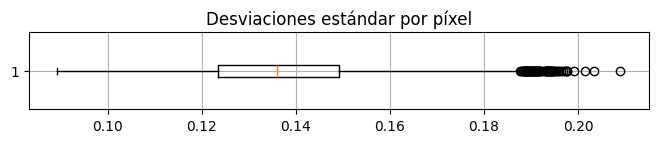

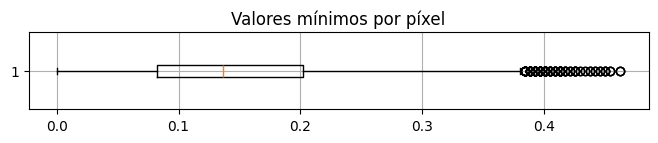

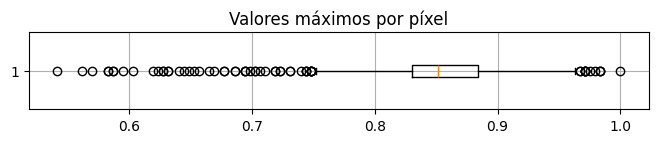

In [ ]:
df_data = pd.DataFrame(oliveti_dataset.data)

# Métricas por píxel
metricas = {
    "Desviaciones estándar por píxel": df_data.std(axis=0),
    "Valores mínimos por píxel": df_data.min(axis=0),
    "Valores máximos por píxel": df_data.max(axis=0),
}
for titulo, valores in metricas.items():
    plt.figure(figsize=(8, 1))
    plt.boxplot(valores, vert=False)
    plt.title(titulo)
    plt.grid(True)
    plt.show()


#### 2.2. Genere una figura con una imágen de cada uno de los individuos

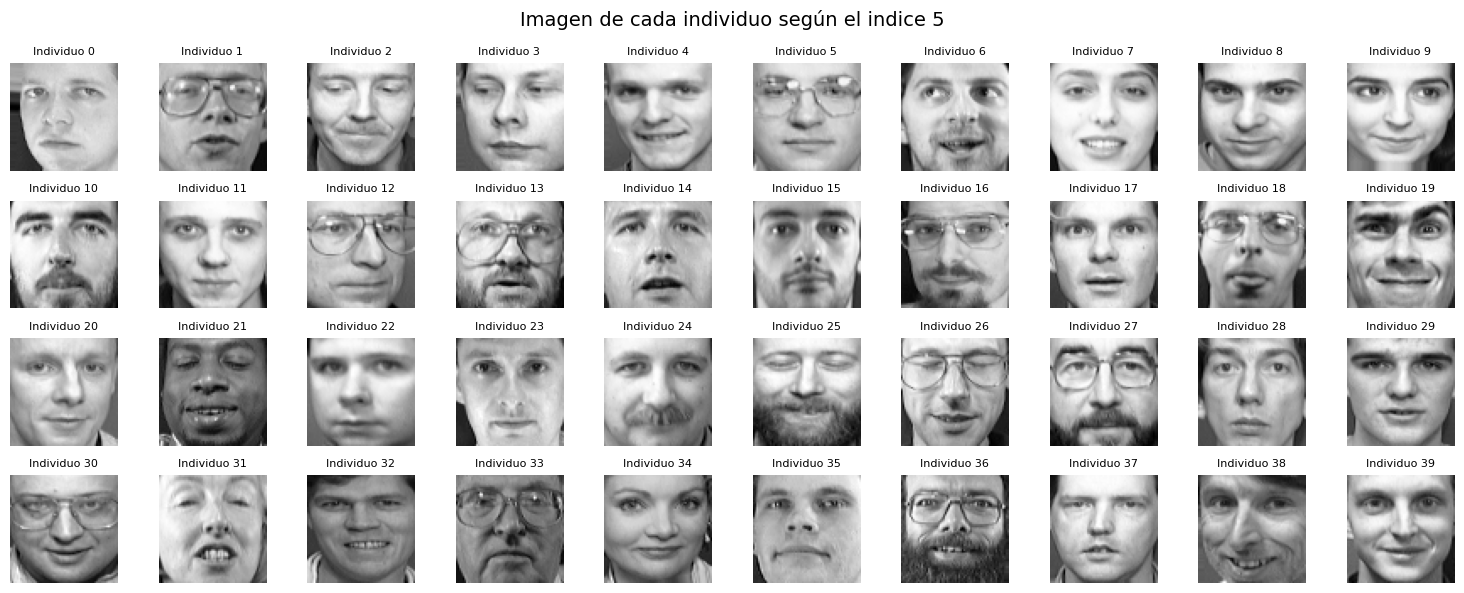

In [5]:
# Utilice este espacio para escribir el código.
import matplotlib.pyplot as plt
import numpy as np

images = oliveti_dataset.images
targets = oliveti_dataset.target

fig, axes = plt.subplots(4, 10, figsize=(15, 6))  # 4 filas x 10 columnas = 40 individuos
axes = axes.ravel() # Aplanar el array de ejes para facilitar la indexación

posicion=5
for i in range(40):
    indice = np.where(targets == i)[0][posicion] #vamos a tomat la sexta imagen de cada individuo
    axes[i].imshow(images[indice], cmap="gray")
    axes[i].set_title(f"Individuo {i}", fontsize=8)
    axes[i].axis("off")

plt.suptitle(f"Imagen de cada individuo según el indice {posicion}", fontsize=14)
plt.tight_layout()
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [6]:
# Utilice este espacio para escribir el código.
from sklearn.preprocessing import StandardScaler

X=oliveti_dataset.data
y=oliveti_dataset.target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
df=pd.DataFrame(X_scaled)
df["labels"]=y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,labels
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

#### K-means

In [14]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

X = df.drop(columns="labels").values
k = 40
# K-means y K-medoides
kmeans = KMeans(n_clusters=k,n_init=10,random_state=123)
kmedoids = KMedoids(n_clusters=40, random_state=123)

kmeans_clusters = kmeans.fit_predict(X)
kmedoids_clusters = kmedoids.fit_predict(X)

df["kmeans_cluster"] = kmeans_clusters
df["kmedoids_cluster"] = kmedoids_clusters


df.head()


,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,labels,clusters,kmedoids_cluster,kmeans_cluster
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0,7,7,1
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0,14,34,38
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0,7,7,1
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0,5,4,8
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0,14,34,36


#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

### Métricas de evaluación de clustering

#### `adjusted_rand_score` (ARI)
Compara los **pares de elementos** y evalúa si están en el mismo cluster o en clusters distintos, en ambas asignaciones (`labels` vs `clusters`).

- ARI = **1.0**  clusters perfectamente alineados con las clases.
- ARI = **0.0**  agrupación aleatoria.
- ARI puede ser **negativo** si la coincidencia es peor que al azar.

---

#### `normalized_mutual_info_score` (NMI)
Mide la **cantidad de información compartida** entre las agrupaciones, basada en teoría de la información (entropía + información mutua).

- NMI = **1.0** asignación perfecta.
- NMI = **0.0** agrupaciones totalmente independientes.


Usaremos estas metricas para comparar lo resultados por los diferentes algoritmos


In [16]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

y= df["labels"]
y_means_pred = df["kmeans_cluster"]


# Calcular métricas
ari_means = adjusted_rand_score(y, y_means_pred)
nmi_means = normalized_mutual_info_score(y, y_means_pred)


# Mostrar resultados
print("Midiendo precision K-means:\n")
print(f"Adjusted Rand Index (ARI) para K-means: {ari_means:.4f}")
print(f"Normalized Mutual Information (NMI) para K-means: {nmi_means:.4f}")


Midiendo precision K-means:

Adjusted Rand Index (ARI) para K-means: 0.4480
Normalized Mutual Information (NMI) para K-means: 0.7755


#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [38]:
# Utilice este espacio para escribir el código.
from sklearn.decomposition import PCA

X = df.drop(columns=["labels", "kmeans_cluster", "kmedoids_cluster"]).values
y = df["labels"]

#PCA con 95% de varianza
pca = PCA(n_components=0.95, random_state=123)
X_pca = pca.fit_transform(X)

print(f"Numero de componentes principales que explican el 95% varianza: {X_pca.shape[1]}")

Numero de componentes principales que explican el 95% varianza: 120


In [34]:
kmeans_pca = KMeans(n_clusters=40, n_init=10, random_state=123)
clusters_pca = kmeans_pca.fit_predict(X_pca)
ari_pca = adjusted_rand_score(y, clusters_pca)
nmi_pca = normalized_mutual_info_score(y, clusters_pca)

print("Midiendo precision K-means con PCA:\n")
print(f"Adjusted Rand Index (ARI) para K-means: {ari_pca:.4f}")
print(f"Normalized Mutual Information (NMI) para K-means: {nmi_pca:.4f}")

Midiendo precision K-means con PCA:

Adjusted Rand Index (ARI) para K-means: 0.4475
Normalized Mutual Information (NMI) para K-means: 0.7869


#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

y= df["labels"]
y_medoids_pred = df["kmedoids_cluster"]

# Calcular métricas
ari_medoids = adjusted_rand_score(y, y_medoids_pred)
nmi_medoids = normalized_mutual_info_score(y, y_medoids_pred)

# Mostrar resultados
print("Midiendo precision K-medoids:\n")
print(f"Adjusted Rand Index (ARI) para K-medoids: {ari_medoids:.4f}")
print(f"Normalized Mutual Information (NMI) para K-medoids: {nmi_medoids:.4f}")

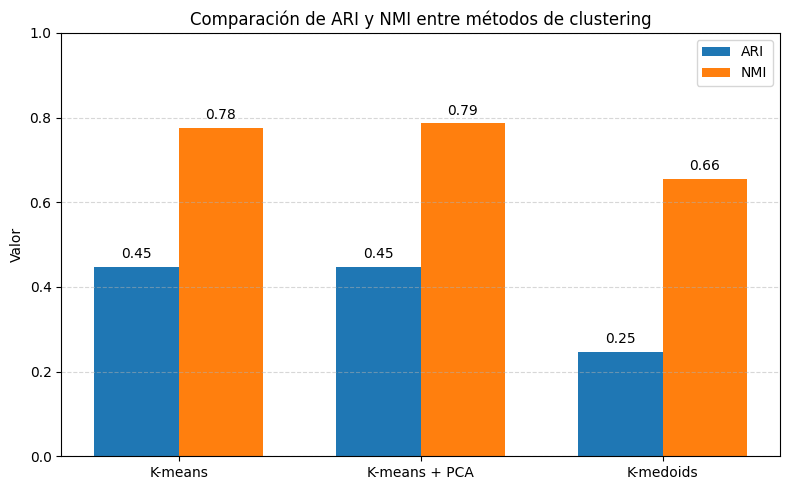

In [39]:
metodos = ["K-means", "K-means + PCA", "K-medoids"]
ari_scores = [ari_means, ari_pca, ari_medoids]
nmi_scores = [nmi_means, nmi_pca, nmi_medoids]


x = np.arange(len(metodos))
width = 0.35  # ancho de cada barra


fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, ari_scores, width, label="ARI")
bars2 = ax.bar(x + width/2, nmi_scores, width, label="NMI")


ax.set_ylabel("Valor")
ax.set_title("Comparación de ARI y NMI entre métodos de clustering")
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.set_ylim(0, 1)
ax.legend()

# Mostrar valores en las barras
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),  # desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones)

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [35]:
# Utilice este espacio para escribir el código.
from sklearn.metrics import silhouette_score
Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 301, 10): 
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(X_scaled)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X_scaled, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

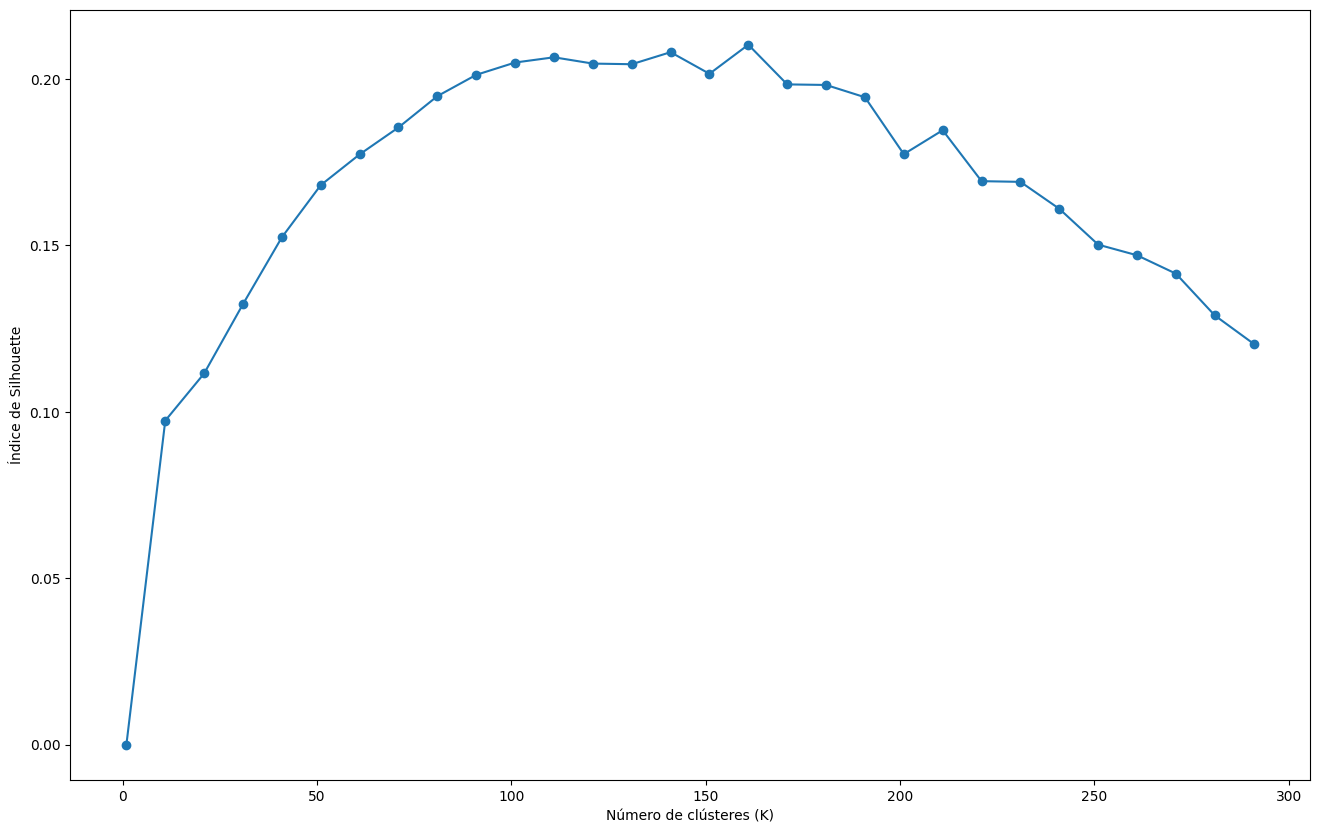

In [36]:
plt.figure(figsize=(16, 10)) 
plt.plot(range(1, 301,10), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

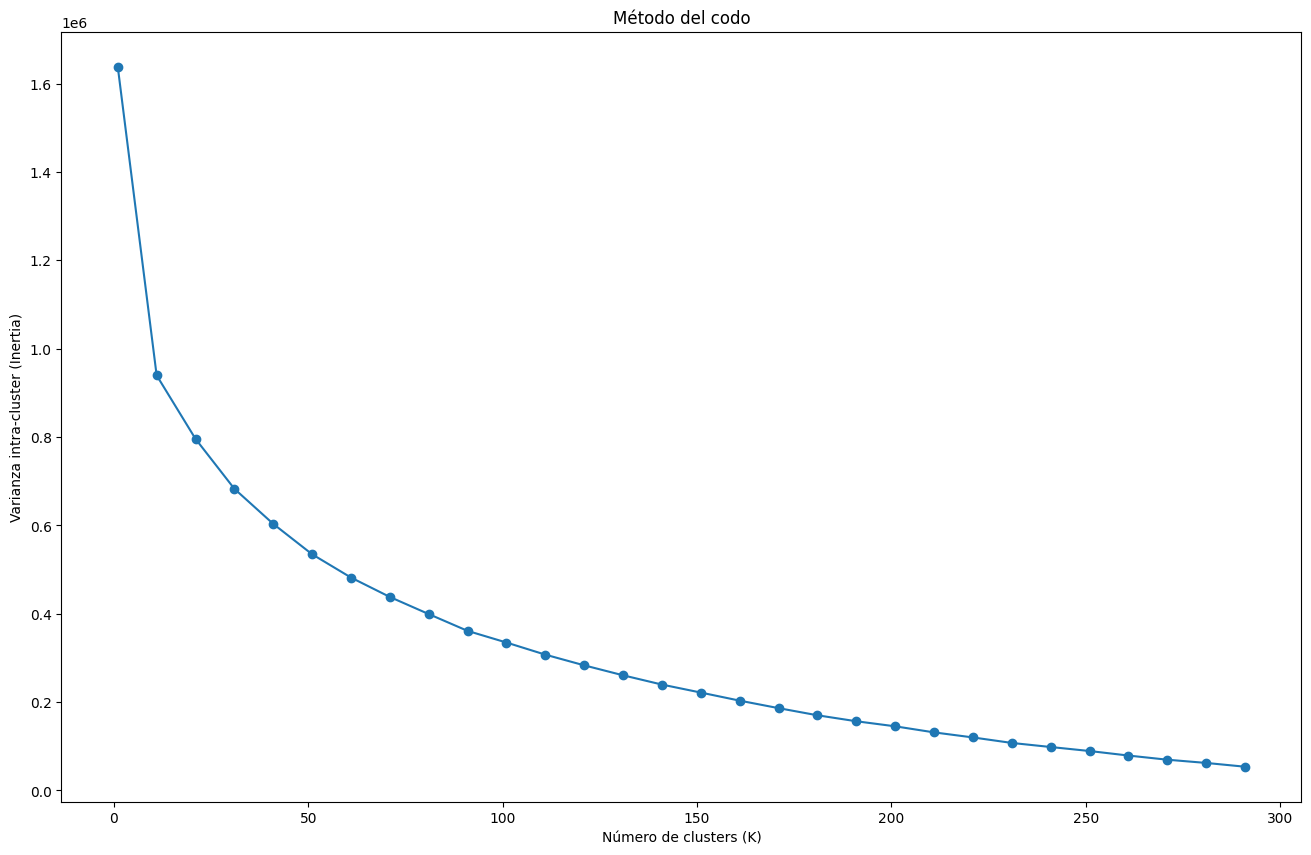

In [37]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 301, 10), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Varianza intra-cluster (Inertia)')
plt.title("Método del codo")
plt.show()